In [348]:
from PIL import Image
import numpy as np
import os
import math
import cv2
from sklearn.linear_model import LinearRegression

In [349]:
X = []
Y = []

In [350]:
folder_path = "datasets/eggs"
for filename in os.listdir(folder_path):
    if filename.endswith(".png") and filename.startswith("1"):
        # Extract grams from the image name donot include the .png
        grams = float(filename.split("-")[1].split(".png")[0])
        
        # Load grayscale image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Calculate the number of white pixels
        threshold = np.mean(image)
        above_threshold = image > threshold
        white_pixels = np.sum(above_threshold)
    
        # Append to X and Y lists
        X.append(white_pixels)
        Y.append(grams)

In [351]:
print(X)
print(Y)

[54031, 53438, 55910, 53439, 55849, 62168, 57768, 56334, 53454, 58372, 55914, 58999, 53964, 52340, 61399, 61761, 56466, 60922, 55339, 55529, 52071, 56456, 56693, 51847, 47860, 49494, 56230, 62931, 55274, 48425, 60764, 52635, 52285, 59893, 57507, 53593, 56262, 56680, 56301, 50762, 51055, 58805, 49818, 50954, 60957, 55649, 58865, 56227, 51251, 55065, 61461, 47411, 58870, 50683, 54141, 53667, 48783, 52799, 59487, 54116, 55201, 56398, 52716, 60626, 54303, 56988, 49500, 56497, 52236, 51326, 51085, 58424, 48066, 60210, 50272, 49922, 58327, 59833, 54564, 49729, 55220, 63358, 57435, 58832, 52091, 54978, 48232, 56883, 58439, 52376, 59850, 53585, 55453, 59376, 52769, 49413, 52750, 56268, 55292, 49722, 49047, 58276, 52832, 58149, 54994, 55696, 56097, 62451, 58694, 56443, 57041, 48908, 51495, 48697, 53153, 53369, 60437, 57123, 53577, 52820, 52748, 60184, 51431, 48765, 52707, 50655, 59018, 59923, 54071, 53709, 62905, 47646, 49713, 49737, 52733, 49589, 59674, 57436, 56617, 54953, 55084, 51777, 61608

In [352]:
X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

print (X)
print (Y)

[[54031]
 [53438]
 [55910]
 [53439]
 [55849]
 [62168]
 [57768]
 [56334]
 [53454]
 [58372]
 [55914]
 [58999]
 [53964]
 [52340]
 [61399]
 [61761]
 [56466]
 [60922]
 [55339]
 [55529]
 [52071]
 [56456]
 [56693]
 [51847]
 [47860]
 [49494]
 [56230]
 [62931]
 [55274]
 [48425]
 [60764]
 [52635]
 [52285]
 [59893]
 [57507]
 [53593]
 [56262]
 [56680]
 [56301]
 [50762]
 [51055]
 [58805]
 [49818]
 [50954]
 [60957]
 [55649]
 [58865]
 [56227]
 [51251]
 [55065]
 [61461]
 [47411]
 [58870]
 [50683]
 [54141]
 [53667]
 [48783]
 [52799]
 [59487]
 [54116]
 [55201]
 [56398]
 [52716]
 [60626]
 [54303]
 [56988]
 [49500]
 [56497]
 [52236]
 [51326]
 [51085]
 [58424]
 [48066]
 [60210]
 [50272]
 [49922]
 [58327]
 [59833]
 [54564]
 [49729]
 [55220]
 [63358]
 [57435]
 [58832]
 [52091]
 [54978]
 [48232]
 [56883]
 [58439]
 [52376]
 [59850]
 [53585]
 [55453]
 [59376]
 [52769]
 [49413]
 [52750]
 [56268]
 [55292]
 [49722]
 [49047]
 [58276]
 [52832]
 [58149]
 [54994]
 [55696]
 [56097]
 [62451]
 [58694]
 [56443]
 [57041]
 

In [353]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [354]:
new_white_pixels = 43953  # Example value
predicted_grams = model.predict([[new_white_pixels]])
print("Predicted grams:", predicted_grams)

Predicted grams: [45.52649885]


In [355]:
# save the model
import pickle
filename = 'model/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [356]:
# load the model from disk
model = pickle.load(open(filename, 'rb+'))

small_count = 0
medium_count = 0
large_count = 0
xl_count = 0

test_path = "datasets/tests"

for filename in os.listdir(test_path):
    if filename.endswith(".png") and filename.startswith("1"):
        # Extract grams from the image name donot include the .png
        wpixels = int(filename.split("-")[2].split(".png")[0])
        result = model.predict([[wpixels]])
        result = math.ceil(result[0])
        if result >= 50 and result <= 54:
            small_count = small_count + 1
        elif result >= 55 and result <= 59:
            medium_count = medium_count + 1
        elif result >= 60 and result <= 64:
            large_count = large_count + 1
        elif result >= 65 and result <= 69:
            xl_count = xl_count + 1

print(small_count)
print(medium_count)
print(large_count)
print(xl_count)

10
7
13
10


In [357]:
# calculate the accuracy with the test data count using cross entropy
small_accuracy = small_count / 10
medium_accuracy = medium_count / 10
large_accuracy = large_count / 10
xl_accuracy = xl_count / 10

small_accuracy = small_accuracy * 100
medium_accuracy = medium_accuracy * 100
large_accuracy = large_accuracy * 100
xl_accuracy = xl_accuracy * 100

print(f"Small accuracy: {small_accuracy}%")
print(f"Medium accuracy: {medium_accuracy}%")
print(f"Large accuracy: {large_accuracy}%")
print(f"XL accuracy: {xl_accuracy}%")

Small accuracy: 100.0%
Medium accuracy: 70.0%
Large accuracy: 130.0%
XL accuracy: 100.0%


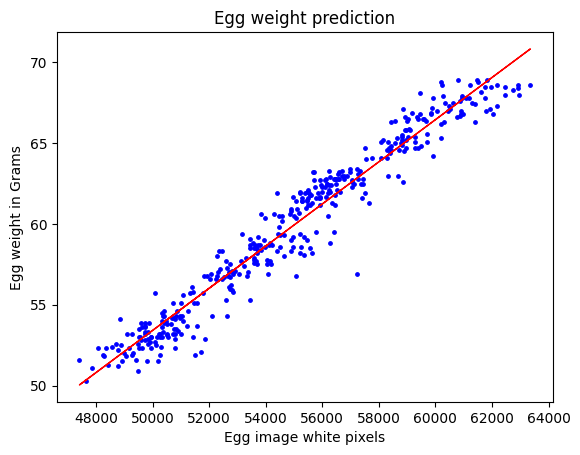

In [358]:
import matplotlib.pyplot as plt

# Data to plot is X and Y using scatter plot # with the fit line
plt.scatter(X, Y, color='blue', s=6)
plt.plot(X, model.predict(X), color='red', linewidth=1)
# put the Y-axis label
plt.ylabel('Egg weight in Grams')
# put the X-axis label
plt.xlabel('Egg image white pixels')
# put the title
plt.title('Egg weight prediction')
# show the plot
plt.show()

In [359]:
# print the table summary
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     7678.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.24e-261
Time:                        10:13:34   Log-Likelihood:                -617.19
No. Observations:                 398   AIC:                             1238.
Df Residuals:                     396   BIC:                             1246.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8064      0.820    -14.402      0.0